In [1]:
#import SparkSession
from pyspark.sql import SparkSession
import pyspark.sql.functions as f

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
21,application_1589208887286_0022,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
spark=SparkSession.builder.appName('bigdata-project').getOrCreate()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
#Cargamos los datasets desde el bucket S3
df_confirmed=spark.read.csv('s3://fcortesj-eafit-20201/covid_datasets/global/confirmados/time_series_covid19_confirmed_global_narrow.csv',inferSchema=True,header=True)
df_deaths=spark.read.csv('s3://fcortesj-eafit-20201/covid_datasets/global/muertes/time_series_covid19_deaths_global_narrow.csv',inferSchema=True,header=True)
df_recovered=spark.read.csv('s3://fcortesj-eafit-20201/covid_datasets/global/recuperados/time_series_covid19_recovered_global_narrow.csv',inferSchema=True,header=True)
df_colombia=spark.read.csv('s3://fcortesj-eafit-20201/covid_datasets/colombia/data.csv',inferSchema=True,header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
#Instalar paquetes necesarios
sc.install_pypi_package('pandas')
sc.install_pypi_package('matplotlib')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl (10.0 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)

  Using cached matplotlib-3.2.1-cp36-cp36m-manylinux1_x86_64.whl (12.4 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl (88 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)

In [5]:
#Importamos los modulos necesarios
from pyspark.sql import functions as f
from pyspark.sql.functions import col, max as max_
import matplotlib.pyplot as plt
import numpy as np

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

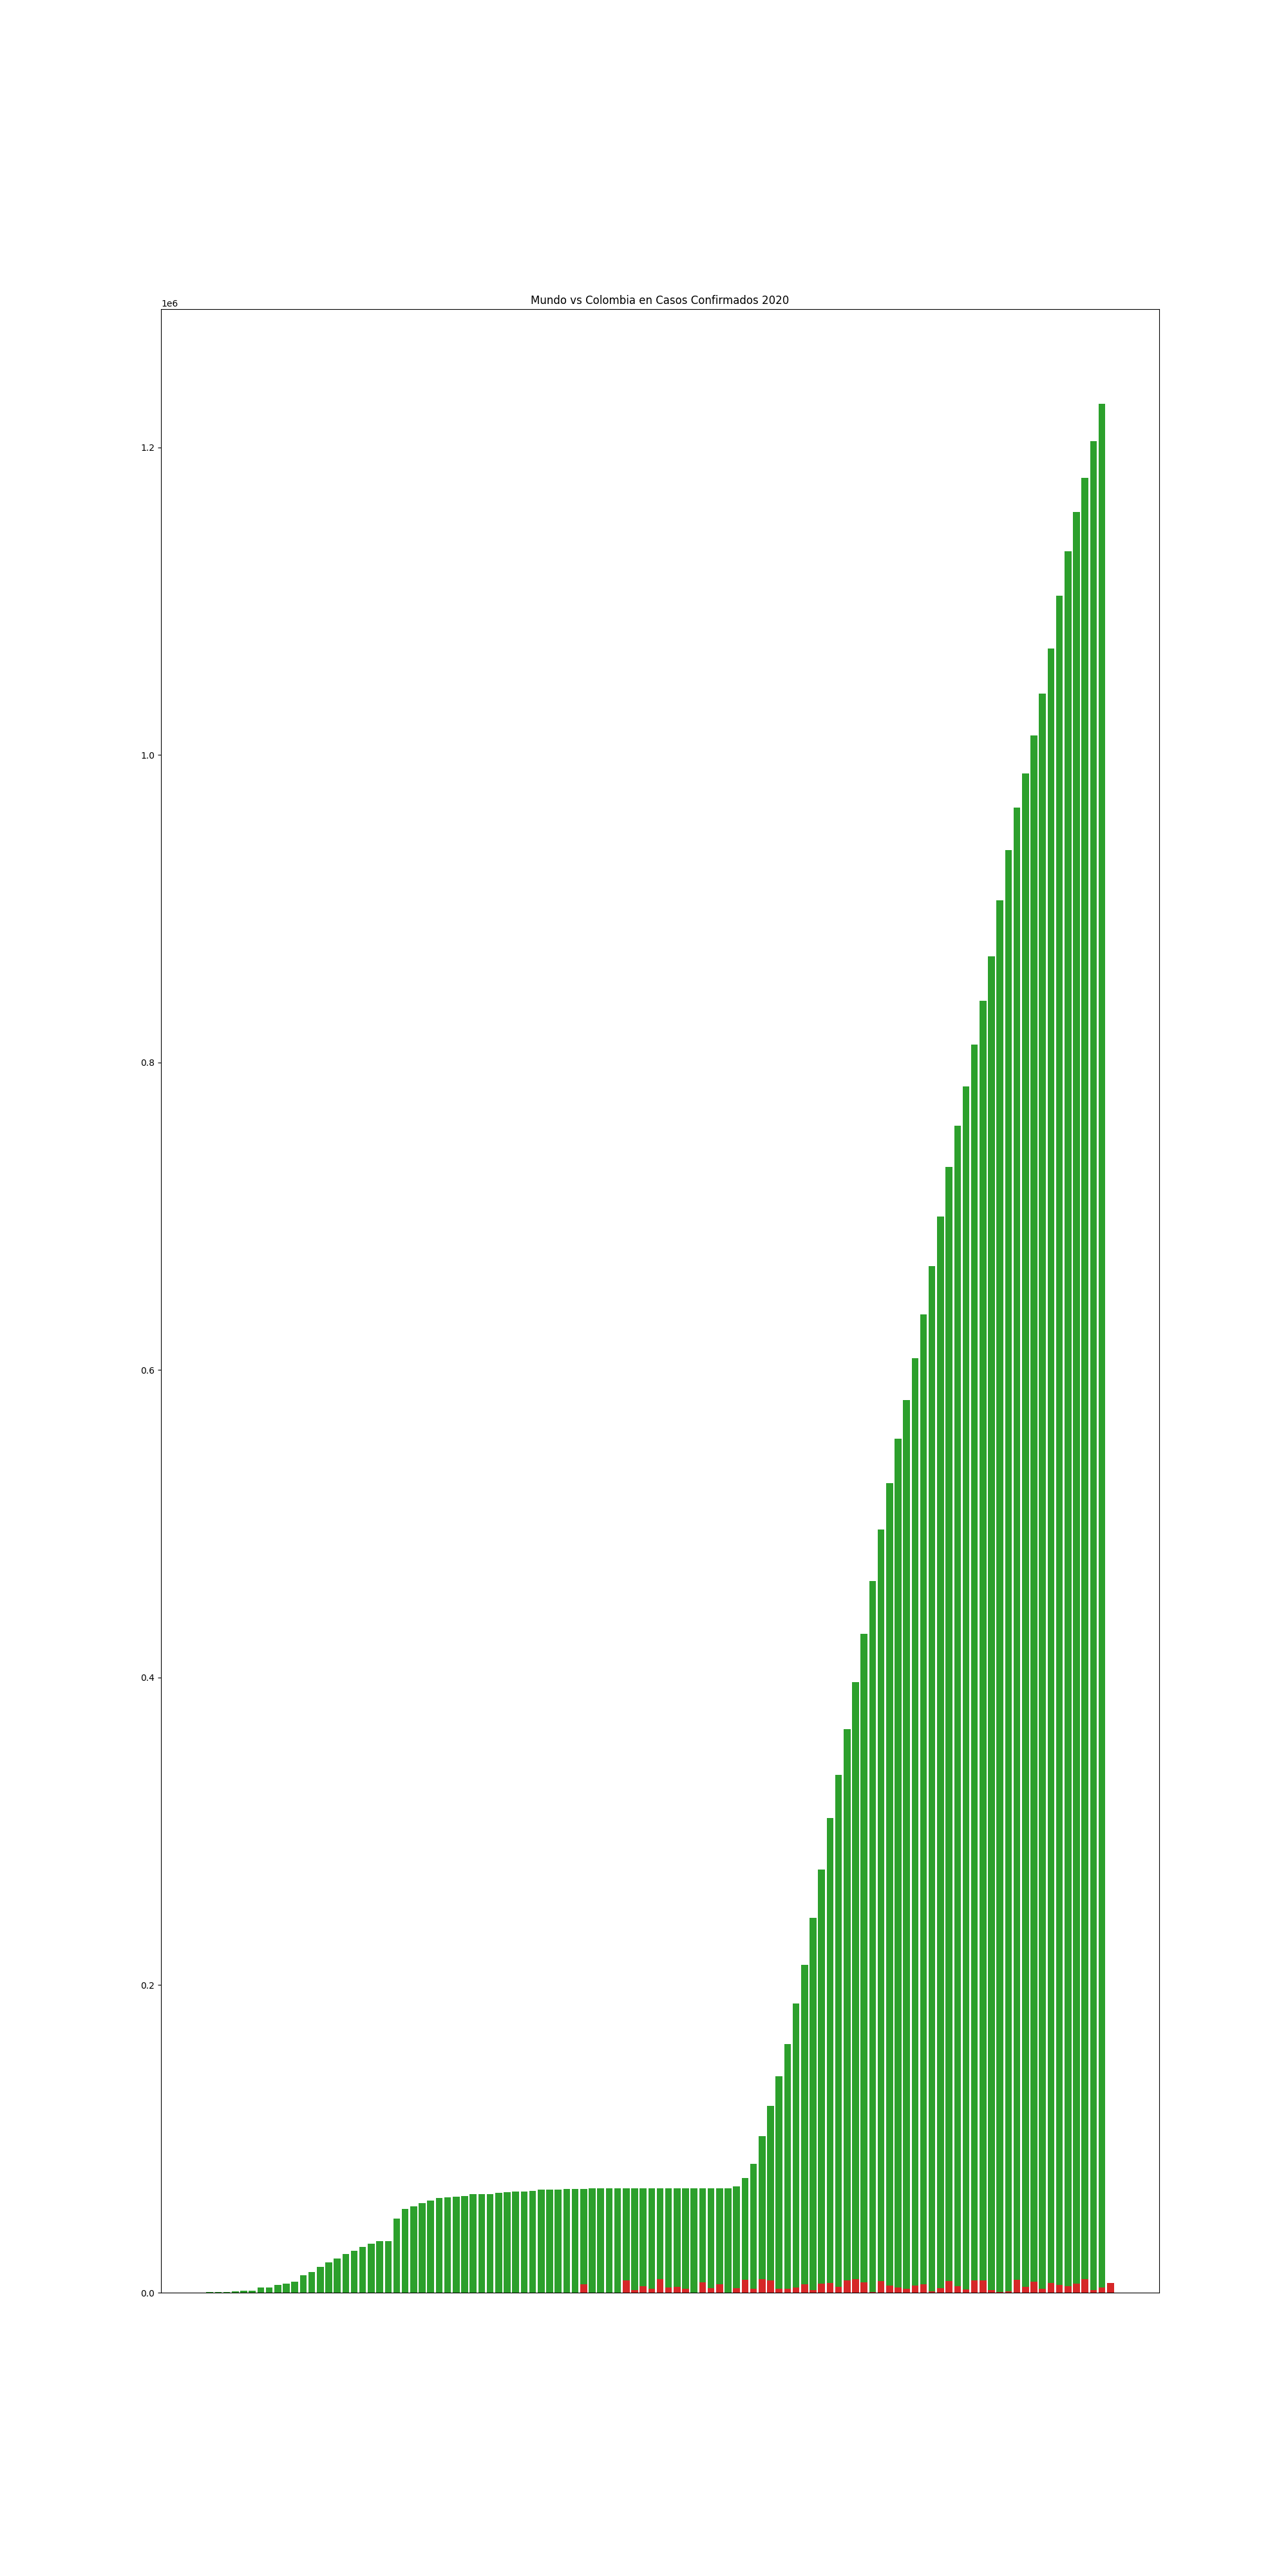

In [8]:
#Graficas comparativas del progreso de casos confirmados

progressCases = df_confirmed.withColumn("Value", col("Value").cast("int")).groupBy("Date").agg(max_("Value")).orderBy('max(Value)',ascending=True)
x = progressCases.toPandas()['Date'].values.tolist()
y = progressCases.toPandas()['max(Value)'].values.tolist()

plt.bar(x[1:],y[1:])

acum = 0

infection_progress = df_colombia.groupBy('Fecha diagnostico').count()
x2 = infection_progress.toPandas()['Fecha diagnostico'].values.tolist()
y2 = infection_progress.toPandas()['count'].values.tolist()

for e in range(len(y2)):
    x2[e] = x2[e][0:10] 
    acum += y2[e]
    y2[e] = acum

plt.bar(x2,y2)
plt.title('Mundo vs Colombia en Casos Confirmados 2020')
plt.xticks([], [])

%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

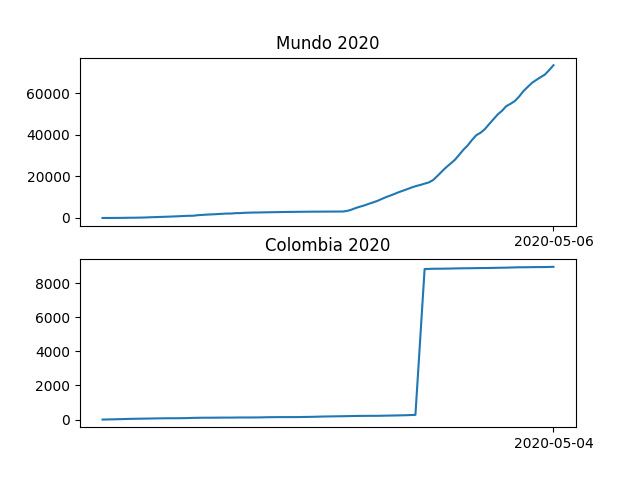

In [35]:
#Graficas comparativas del progreso de los casos de  muerte por COVID

fig, ax = plt.subplots(2)

progressCases = df_deaths.withColumn("Value", col("Value").cast("int")).groupBy("Date").agg(max_("Value")).orderBy('max(Value)',ascending=True)
x = progressCases.toPandas()['Date'].values.tolist()
y = progressCases.toPandas()['max(Value)'].values.tolist()

ax[0].plot(x[1:],y[1:])
ax[0].set_title('Muertes Mundo 2020')
ax[0].set_xticks(x[-1:])

acum = 0

infection_deaths = df_colombia.groupBy('Fecha de muerte').count()
x2 = infection_deaths.toPandas()['Fecha de muerte'].values.tolist()
y2 = infection_deaths.toPandas()['count'].values.tolist()

for e in range(len(y2)):
    if x2[e] is None:
        x2[e] = 'NA';
    else:
        x2[e] = x2[e][0:10]
    acum += y2[e]
    y2[e] = acum

ax[1].plot(x2,y2)
ax[1].set_title('Muertes Colombia 2020')
ax[1].set_xticks(x2[-1:])

%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

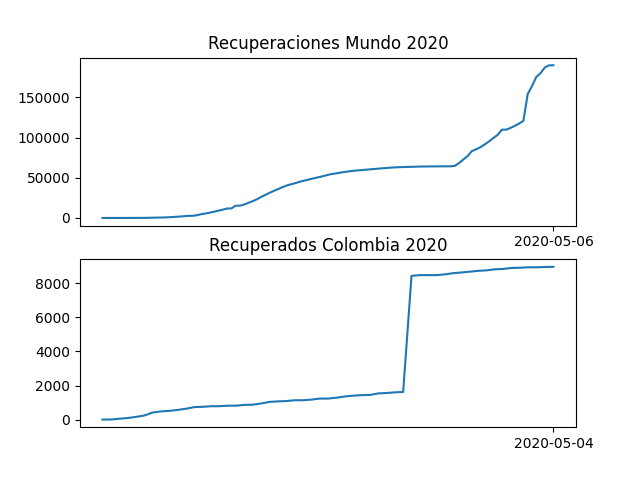

In [37]:
#Graficas comparativas del progreso de los casos de recuperacion por COVID

fig2, ax2 = plt.subplots(2)

progressCases = df_recovered.withColumn("Value", col("Value").cast("int")).groupBy("Date").agg(max_("Value")).orderBy('max(Value)',ascending=True)
x = progressCases.toPandas()['Date'].values.tolist()
y = progressCases.toPandas()['max(Value)'].values.tolist()

ax2[0].plot(x[1:],y[1:])
ax2[0].set_title('Recuperaciones Mundo 2020')
ax2[0].set_xticks(x[-1:])

acum = 0

infection_deaths = df_colombia.groupBy('Fecha recuperado').count()
x2 = infection_deaths.toPandas()['Fecha recuperado'].values.tolist()
y2 = infection_deaths.toPandas()['count'].values.tolist()

for e in range(len(y2)):
    if x2[e] is None:
        x2[e] = 'NA';
    else:
        x2[e] = x2[e][0:10]
    acum += y2[e]
    y2[e] = acum

ax2[1].plot(x2,y2)
ax2[1].set_title('Recuperados Colombia 2020')
ax2[1].set_xticks(x2[-1:])

%matplot plt